# Задача: Земное время и всемирное время

Выполнил Бекетов Е.В. \
студент группы 3823М1ПМвм

## Описание задачи

Всемирное время UT связано с вращением Земли. Поскольку вращение Земли вокруг собственной оси замедляется (из-за приливных сил), причем некоторым неравномерным образом, то в некоторых случаях (например, в астрономии) необходима другая шкала времени, текущая равномерно. В отличие от всемирного времени — земное время TT является теоретически равномерной временной шкалой.

Ниже приведены данные (полученные наблюдениями) зависимости $\Delta T = TT - UT$ (в секундах) от года. [Morrison, L. V.; Stephenson, F. R., Historical values of the Earth’s clock error $\Delta T$ and the calculation of eclipses, Journal for the History of Astronomy, 35(2004), 327-336 — addendum in ibid., 36 (2005), 339]

Ниже представлены данные:

In [3]:
years = [-1000, -900, -800, -700, -600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700,
         800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780,
         1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960,
         1970, 1980, 1990, 2000
]

deltaT = [25400, 23700, 22000, 20400, 18800, 17190, 15530, 14080, 12790, 11640, 10580, 9600, 8640, 
          7680, 6700, 5710, 4740, 3810, 2960, 2200, 1570, 1090, 740, 490, 320, 200, 120, 9, 10, 11, 
          11, 12, 13, 15, 16, 17, 17, 14, 13, 12, 8, 6, 7, 8, 2, -5, -6, -3, 10, 21, 24, 24, 29, 33,
          40, 51, 57, 65
]

## Требования к задаче

1. Изобразите эти данные на графике. Отдельно постройте график для данных начиная с 1700 г.
2. Методом наименьших квадратов подберите многочлены степеней 1 — 4, аппроксимирующие данные. Вначале рекомендуется перейти к сдвинутой шакле по времени, в качестве нулевого момента времени, например, выбрав 1800 г.
3. Сравните построенные приближения между собой (по точности) и с “классическим” приближением $32((\text{year} − 1820) / 100)^2$.
4. Сделайте выводы.


## Программная реализация

In [4]:
# Импортируем ключевые библиотеки
import numpy as np
import matplotlib.pyplot as plt

# Функция вывода графиков 
def plot_dependency_DT(X, Y):
    plt.scatter(X, Y, label = 'Измерения $\\Delta T$')
    plt.xlabel('Годы')
    plt.ylabel('$\\Delta T$')
    plt.title('Размер $\\Delta T$ в зависмости от земного года')
    plt.grid()
    plt.legend()
    plt.show()

Изобразим данные на грифике

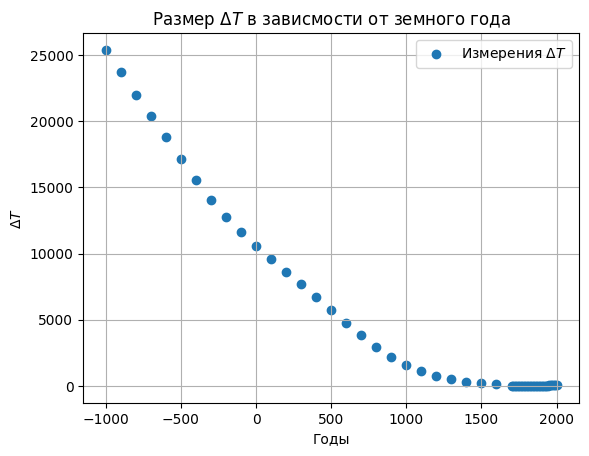

In [5]:
plot_dependency_DT(years, deltaT)

Видно, что многие годы это значение стремительно убывало, посмотрим подробнее, что происходило в последние 300 лет

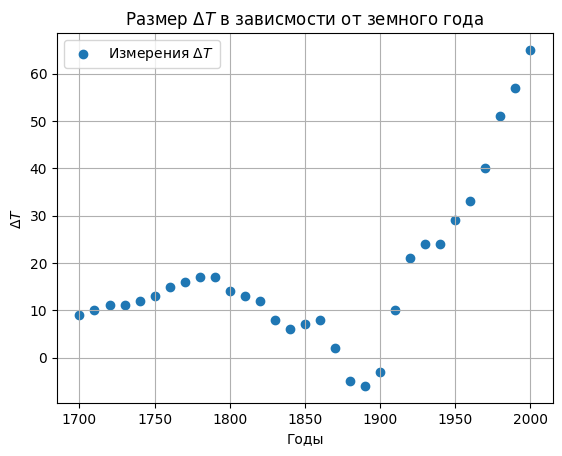

In [6]:
plot_dependency_DT(years[27:], deltaT[27:])

За спадом заметен теперь рост, причем с довольно заметным проседанием/спадом в районе 1800 - 1900 гг.

Построим МНК-полиномы 1 - 4 степени сначала начиная с 1800 г., а потом с начала

In [93]:
# Функция для отрисовки линий тренда разных полиномов
def plot_trend_line(X, Y):
    fig, axes = plt.subplots(2, 2, figsize = (10, 10))
    axes = axes.ravel()
    for degree in range(4):
        coefficients = np.polyfit(X, Y, degree + 1)
        Y_fit = np.polyval(coefficients, X)
        ss_res = np.sum((Y - Y_fit) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        R2 = np.round(1 - (ss_res / ss_tot), 4)

        axes[degree].scatter(X, Y, label = 'Измерения $\\Delta T$')
        axes[degree].plot(X, Y_fit, label = f'Полином степени {degree + 1}', color = 'orange')
        axes[degree].set_title(f'Линия тренда для полинома степени {degree + 1} \nКоэффициент детерминации $R^2$ = {R2}')
        axes[degree].set_xlabel('Годы')
        axes[degree].set_ylabel('$\\Delta T$')
        axes[degree].grid()
        axes[degree].legend()
    plt.tight_layout()
    plt.show()

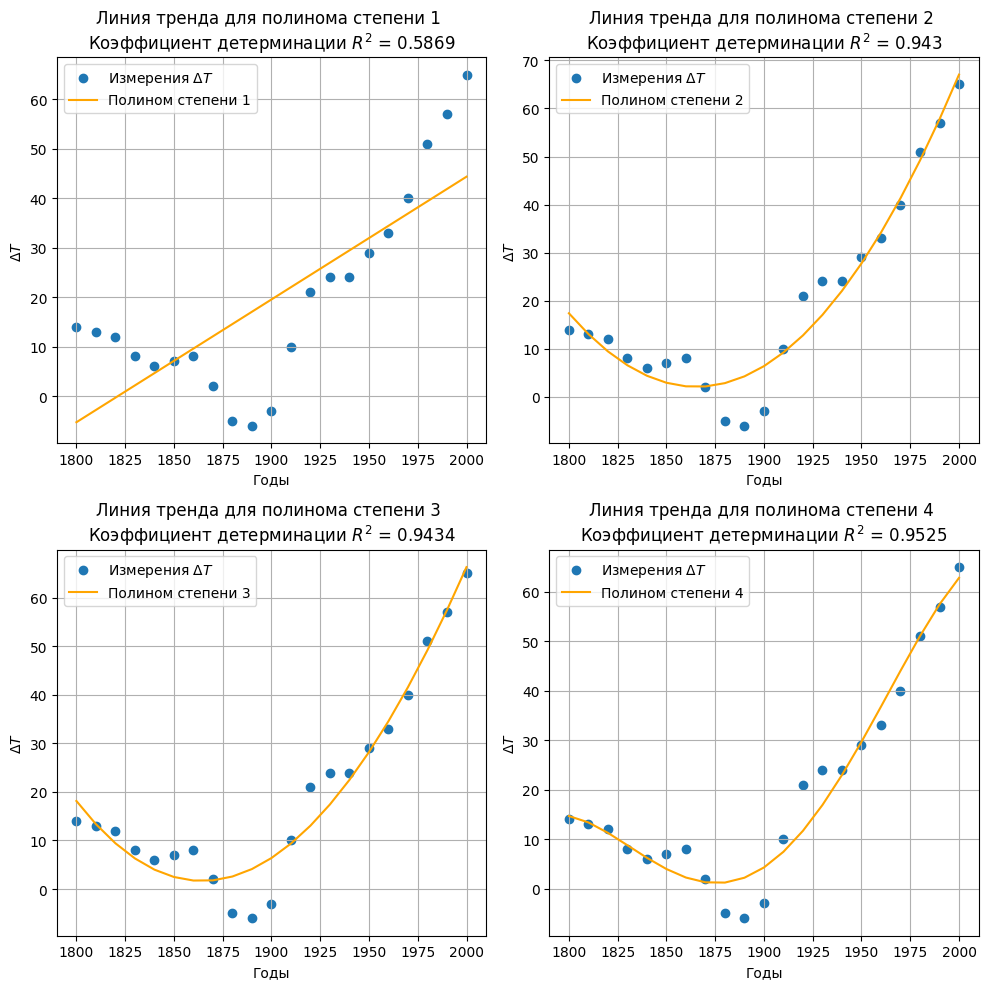

In [92]:
plot_trend_line(years[37:], deltaT[37:])

Хорошо видно, что полином 1 степени достаточно плохо аппроксимирует данные, математически это отображается малым значением коэффициента детерминации, а вот ситуация с полиномами 2 - 4 степени ситуация уже лучше, хотя при этом разницы между ними практически никакой, как визуально, так и численно $R^2 \approx 0.94$, получается для данного временного интервала не стоит усложнять жизнь и достаточно взять полином 2 степени.

Теперь сравним их с "классическим" приближением:
$$32(\frac{\text{year - 1820}}{100})^2$$ 
для всего интервала времени

In [107]:
# Функция для отрисовки линии тренда и классического приближения
def plot_comparison_R2(X, Y):
    fig, axes = plt.subplots(2, 2, figsize = (10, 10))
    axes = axes.ravel()
    for degree in range(4):
        coefficients = np.polyfit(X, Y, degree + 1)
        Y_fit = np.polyval(coefficients, X)
        ss_res_poly = np.sum((Y - Y_fit) ** 2)
        ss_tot_poly = np.sum((Y - np.mean(Y)) ** 2)
        R2_poly = 1 - (ss_res_poly / ss_tot_poly)

        Y_class = 32*((np.array(X) - 1820) / 100)**2
        ss_res_class = np.sum((Y - Y_class) ** 2)
        ss_tot_class = np.sum((Y - np.mean(Y)) ** 2)
        R2_class = 1 - (ss_res_class / ss_tot_class)

        axes[degree].scatter(X, Y, label = 'Измерения $\\Delta T$')
        axes[degree].plot(X, Y_fit, label = f'Полином степени {degree + 1}', color = 'orange')
        axes[degree].plot(X, Y_class, label = f'Классическое приближение', color = 'purple')
        axes[degree].set_title(f'Линия тренда для полинома степени {degree + 1} \n'
                               f'Относительная разница в % для R^2: {np.round(R2_poly / R2_class - 1, 4)* 100}% \n')

        axes[degree].set_xlabel('Годы')
        axes[degree].set_ylabel('$\\Delta T$')
        axes[degree].grid()
        axes[degree].legend()
    plt.tight_layout()
    plt.show()

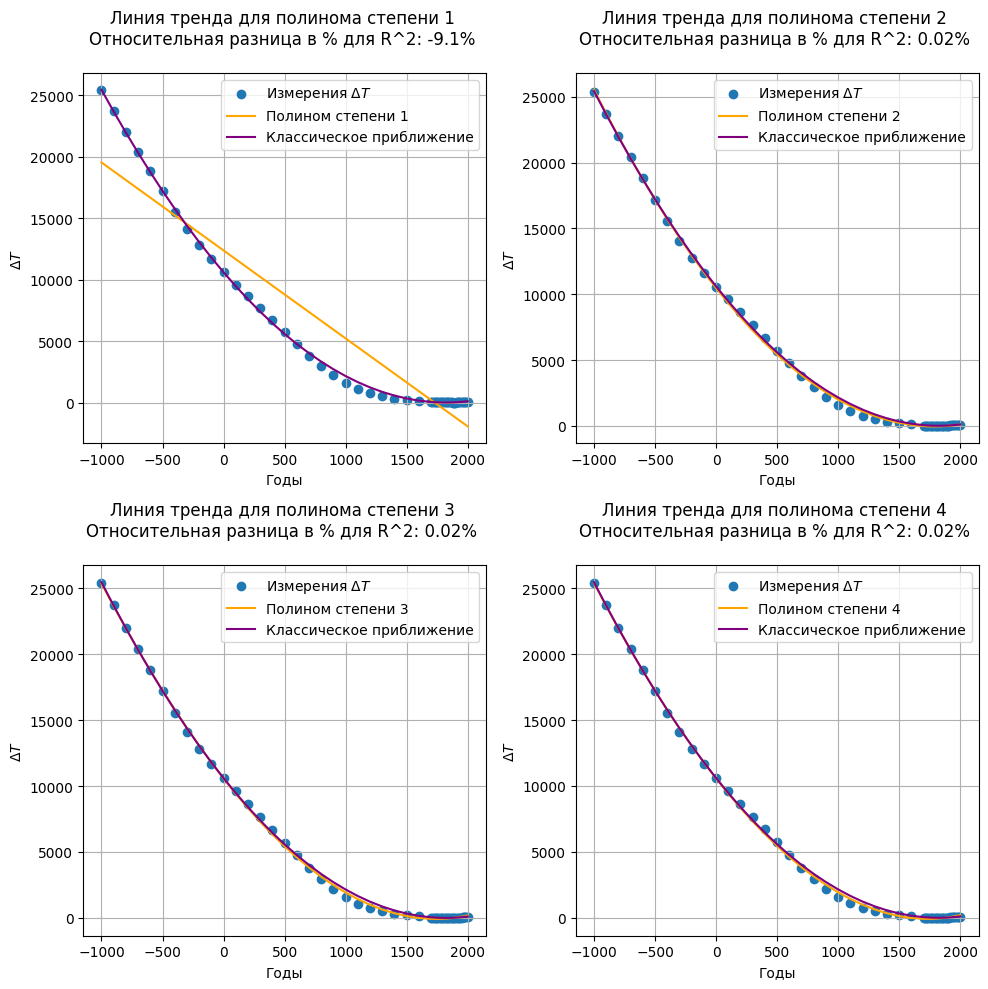

In [108]:
plot_comparison_R2(years, deltaT)

Как видно полиномиальные приближения достаточно точно соотносятся с "классическим", что не может не радовать. Однако на $9.1 \%$ результат для линейного хуже, а для степеней 2 - 4 он даже чуточку лучше, каждый на $0.02 \%$. Получается, вывод примерно тот же, что и для интервала с 1800 до н.в: парабола прекрасно подходит для аппроксимации данных.

## Заключение

В итоге хочется сделать небольшое заключение по данной работе. До этой лабы я уже сталкивался с вопросом аппроксимации данных с помощью различных линий тренда, однако я занимался этим используя только excel, теперь же я сделал это с помщью моего любимого python (оказалось что это даже чуточку проще чем в excel). Для такой необычной задачи, я построил линии тренда и посмотрел как они соотносятся с "классическим" приближением, я не был особо удивлен тому, что они очень близки по значениями, но я удивился тому, что они даже чуточку лучше =).